In [1]:
import pandas as pd
import os

#Dataframe Visual Settings
pd.set_option('display.max_rows',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',400)

In [2]:
payment_methods = ('POS PURCHASE Non-PIN','POS PURCHASE with PIN','Person-to-Person Transfer','VENMO')
budget_cells = {'Student Loans':'C2','Car Payment':'C3','USAA Insurance':'C4','Rent':'C5','Phone':'C6',
               'Gas':'C7','Utilities':'C8','Tolls/Uber/Metro/Parking':'C9','Dining Out':'C10','Groceries':'C11',
               'Entertainment':'C12','Tithe':'C13','Medical':'C14','401k':'C15','Maintenance Service':'C16',
               'Gym':'C17','Misc':'C18','Taxes':'C20','Paycheck':'A24','Extra':'B24'}

In [3]:
def clean_bank_statement_file(filename):
    """
    Extract, modify & clean bank statement raw file for neater format
    """
    #Cleaning data
    # csv_file = '\Bank Statements\'' + filename
    df = pd.read_csv(filename,
                     usecols=['Transaction Number','Date','Memo','Amount Debit','Amount Credit'],
                     skiprows=3)
    
    df.fillna({'Amount Debit':0, 'Amount Credit':0},inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    df.sort_values(by=['Date'],ascending=False,ignore_index=True,inplace=True)
    df['Memo'].fillna('Default',inplace=True)
    df['Transaction Number'] = df['Transaction Number'].apply(lambda x: x.split('**')[1])
    df['Purchase Date'] = df[df['Memo'].str.contains('1574 ',na=False)]['Memo']\
        .apply(lambda x: x.split('1574 ')[1])
    df['Purchase Date'] = pd.to_datetime(df['Purchase Date'],format = '%m/%d %H:%M')
    df['Purchase Date'] = df['Purchase Date']+pd.DateOffset(years=120)
    df.loc[df['Purchase Date'].isna(),'Purchase Date'] = df['Date'].copy()
    df['Memo'] = df['Memo'].apply(lambda x: x.split('*****')[0])
    df['Content'] = df['Transaction Number'] + ' ' + df['Memo']
    df['Amount'] = df['Amount Debit'].astype(float) + df['Amount Credit'].astype(float)
    df['Category'] = 'Default'
    df.drop(df[df['Content'].str.contains("INTERNET TRANSFER",na=False)].index,inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.drop(['Transaction Number','Memo','Amount Debit','Amount Credit'],
            axis=1,inplace=True)
    df.sort_values(by=['Purchase Date'],ascending=False, inplace=True)
    return df
  

In [4]:
def categorize(df):
    #Easier Categorization
    df.loc[df['Content'].str.contains("UBER EATS",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("HARRIS",na=False),'Category'] = 'Groceries'
    df.loc[df['Content'].str.contains("GIANT",na=False),'Category'] = 'Groceries'
    df.loc[df['Content'].str.contains("USAA",na=False),'Category'] = 'USAA Insurance'
    df.loc[df['Content'].str.contains("Accenture",na=False),'Category'] = 'Pay Check'
    df.loc[df['Content'].str.contains("XSPORT",na=False),'Category'] = 'Gym'
    df.loc[df['Content'].str.contains("DISTRICT MARTIAL ARTS",na=False),'Category'] = 'Gym'
    df.loc[df['Content'].str.contains("PARKING",na=False),'Category'] = 'Tolls/Uber/Metro/Parking'
    df.loc[df['Content'].str.contains("NAZRET",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("TAJ OF INDIA",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("DCPILLAR",na=False),'Category'] = 'Tithe'
    df.loc[df['Content'].str.contains("GOOGLE",na=False),'Category'] = 'Entertainment'
    df.loc[df['Content'].str.contains("VENMO/CASHOUT",na=False),'Category'] = 'Venmo Extra'
    df.loc[df['Content'].str.contains("CITGO",na=False),'Category'] = 'Gas'
    df.loc[df['Content'].str.contains("SHELL",na=False),'Category'] = 'Gas'
    df.loc[df['Content'].str.contains("PUPATELLA",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("GOOD COMPANY DONUT",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("STARBUCKS",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("UBER TRIP",na=False),'Category'] = 'Tolls/Uber/Metro/Parking'
    df.loc[df['Content'].str.contains("VERIZON",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("WASHINGTON GAS",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("ENERGY",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("TOM COLEMAN",na=False),'Category'] = 'Phone'
    df.loc[df['Content'].str.contains("STDNT LOAN",na=False),'Category'] = 'Student Loans'
    df.loc[(df['Content'].str.contains("VENMO/PAYMENTWALTER COLEMAN Default",na=False)) &
           ((df['Amount'] == -668.75) | (df['Amount'] == -845)),'Category'] = 'Rent'
    df.loc[df['Content'].str.contains("Margaret Coleman",na=False),'Category'] = 'Extra'
    df.loc[df['Content'].str.contains("Person-to-Person TransferPAYPAL",na=False),'Category'] = 'Extra'
    return df

In [14]:
month_groceries = grand_df[grand_df['Category'] == 'Groceries'].groupby(grand_df['Date'].dt.strftime('%B'))\
    ['Amount'].sum()
month_groceries.index = [4,8,7,6,3,5,11,10,9]
month_groceries = month_groceries.sort_index()
month_groceries.index = ['March','April','May','June','July','Aug','Sept','Oct','Nov']
month_groceries = month_groceries*-1
plt.figure(figsize=(12,8))
plt.title('Monthly Grocery Expenditure')
plt.plot(month_groceries.index,month_groceries)
plt.savefig('MonthlyExpenditure')

NameError: name 'grand_df' is not defined

In [ ]:
#For next time:
#1.) Find cleaner way to parse through files and concatenate, create separate folder if possible
#2.) Create additional timestamp column for purchase date found in content string
#3.) Create boolean column for POS PURCHASE on PIN and remove this header from content
#4.) Find additional potential data points
#5.) Label known values as "miscellaneous"
#5.) Train random forest classifier with labeled data
#6.) Look at results on default values in test set, and give appropriate manual categorizations
#7.) Upload official results to a to 'Budget2020.xlsx' spreadsheet on November or December Sheetname
#... That marks the end of the first project, congrats Walter! You're almost there!
#Some additional things that would be dope!
#8.) Create summary visuals for spending, deficits, focus areas etc.
#9.) Reformat 'Budget2020.xlsx' to include more categories such as Social Security, state taxes, etc.
#10.) Download all Accenture paystubs, and write parsing algorithm to upload data to 'Budget2020.xlsx'
#11.) Compare my budget manual analysis, paystubs and bank statements
#12.) Include Savings and Direct Deposit Account in the ultra download
#13.) Create 'networth calculator' that includes investment accounts, car value and all other financial data
#14.) Abstract findings to automated visuals that show networth, performance in spending & investments, etc.
#15.) Post to github, and explain methodology and findings
#16.) Post on Data Science Facebook Group and to friends, allow users & friends to see code
#17.) Post on LinkedIn for recruiters & colleagues
#18.) Create Medium.com article of bank parser with step-by-step procedures, results and usefulness (make money)
#19.) Email code to Atlantic Union, explain to them some bugs found ('Fees') and see if their developers want it
#19.) Adapt code to work with other bank statements, thus code must be clean, beautiful & fast!

In [15]:
directory = r'C:\Users\waltj\OneDrive\BankParser'

In [16]:
df_list = []
#Get list of files
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df_list.append(filename)
df_list

['AprilChecking.csv',
 'AugustChecking.csv',
 'JulyChecking.csv',
 'JuneChecking.csv',
 'MarchChecking.csv',
 'MayChecking.csv',
 'NovemberChecking20.csv',
 'OctoberChecking.csv',
 'SeptemberChecking.csv']

In [9]:
df_list[0]

'AprilChecking.csv'

In [17]:
grand_df = clean_bank_statement_file(df_list[0])

In [18]:
#Take each file, and clean it into proper format
#Concatentate each file

grand_df = clean_bank_statement_file(df_list[0])

df_list = df_list[1:]

for file in df_list:
    temp_df = clean_bank_statement_file(file)
    grand_df = pd.concat([grand_df,temp_df],ignore_index=True)

In [19]:
grand_df

,Date,Purchase Date,Content,Amount,Category
0,2020-04-29,2020-04-29 12:47:00,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-5.11,Default
1,2020-04-29,2020-04-29 02:32:00,Person-to-Person TransferPOP*Margaret Coleman Visa Direct VAPOPMON,250.00,Default
2,2020-04-29,2020-04-28 22:44:00,POS PURCHASE Non-PINPP*GOOGLE A MEDIUM CORP 402-935-7733 CAINC000,-4.99,Default
3,2020-04-28,2020-04-28 13:17:00,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-5.11,Default
4,2020-04-27,2020-04-26 22:23:00,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA INB600,-21.23,Default
5,2020-04-27,2020-04-26 22:23:00,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA INB500,-3.70,Default
6,2020-04-24,2020-04-24 15:16:00,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-47.51,Default
7,2020-04-23,2020-04-23 03:43:00,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA IN8900,-2.09,Default
8,2020-04-23,2020-04-23 03:43:00,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA IN1610,-17.49,Default
9,2020-04-23,2020-04-22 19:30:00,POS PURCHASE Non-PINVTG*Emmaus Family Couns 703-7292822 VA000000,-125.00,Default


In [24]:
grand_df.sort_values(by=['Purchase Date'],ascending=False, inplace=True)

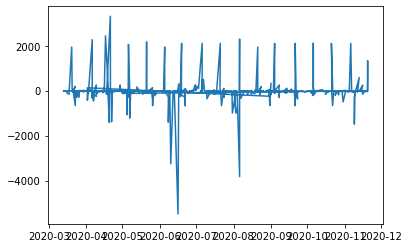

In [23]:
import matplotlib.pyplot as plt

plt.plot(grand_df['Purchase Date'],grand_df['Amount'])

In [78]:
type(df_list[0])

str

In [22]:
df_list[0]

'AprilChecking.csv'

In [21]:
    df = pd.read_csv(df_list[0],
                     usecols=['Transaction Number','Memo','Amount Debit','Amount Credit'],
                     skiprows=3)

FileNotFoundError: [Errno 2] File AprilChecking.csv does not exist: 'AprilChecking.csv'

In [95]:
grand_df = categorize(grand_df)

In [96]:
grand_df

,Date,Content,Amount,Category
0,4/29/2020,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-5.11,Groceries
1,4/29/2020,POS PURCHASE Non-PINPP*GOOGLE A MEDIUM CORP 402-935-7733 CAINC000,-4.99,Entertainment
2,4/29/2020,Person-to-Person TransferPOP*Margaret Coleman Visa Direct VAPOPMON,250.00,Default
3,4/28/2020,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-5.11,Groceries
4,4/27/2020,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA INB600,-21.23,Dining Out
5,4/27/2020,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA INB500,-3.70,Dining Out
6,4/24/2020,POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001,-47.51,Groceries
7,4/23/2020,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA IN8900,-2.09,Dining Out
8,4/23/2020,POS PURCHASE Non-PINUBER EATS HELP.UBER.COM CA IN1610,-17.49,Dining Out
9,4/23/2020,POS PURCHASE Non-PINVTG*Emmaus Family Couns 703-7292822 VA000000,-125.00,Default


In [97]:
len(grand_df)

644

In [101]:
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      644 non-null    object 
 1   Content   644 non-null    object 
 2   Amount    644 non-null    float64
 3   Category  644 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.2+ KB


In [100]:
grand_df.describe()

,Amount
count,644.000000
mean,-12.697780
std,504.947829
min,-5486.000000
25%,-41.810000
50%,-15.900000
75%,-3.500000
max,3311.310000


In [102]:
grand_df['Amount'].sum()

-8177.37

In [103]:
grand_df['Content'].value_counts()

POS PURCHASE with PINGIANT 0774 ARLINGTON VA 001                       87
VENMO/PAYMENTWALTER COLEMAN Default                                    27
POS PURCHASE with PINHARRIS TEETER #3 950 S ARLINGTON VA999999         26
POS PURCHASE Non-PINARLINGTON METER PARKING ARLINGTON VA694452         25
VENMO/CASHOUTWALTER COLEMAN Default                                    21
Accenture Federa/PAYRLL DEPColeman, Walter J                           19
POS PURCHASE with PINHARRIS TEETER #3 ARLINGTON VA 380371              16
Pillar DC/Pillar DCPILLAR CHURCH OF WASHI                              12
FEDLOANSERVICING/STDNT LOANWALTER COLEMAN                              10
VERIZON/PAYMENTRECWALTER COLEMAN Default                                8
POS PURCHASE Non-PINVTG*Emmaus Family Couns 703-7292822 VA000000        8
WASHINGTON GAS/PAYMENTEvan Barnes                                       7
Person-to-Person TransferPAYPAL*Coleman Walter San Jose CACNP TX        7
ROBINHOOD/FundsWalter Coleman Default 

In [104]:
grand_df['Date'] = pd.to_datetime(grand_df['Date'], infer_datetime_format=True)

In [105]:
grand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      644 non-null    datetime64[ns]
 1   Content   644 non-null    object        
 2   Amount    644 non-null    float64       
 3   Category  644 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 20.2+ KB


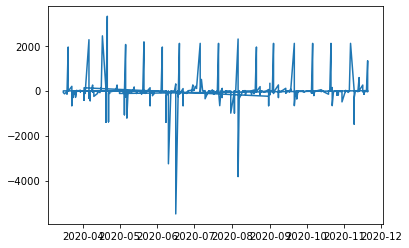

In [106]:
import matplotlib.pyplot as plt

plt.plot(grand_df['Date'],grand_df['Amount'])

In [110]:
grand_df.sort_values(by=['Date'],ascending=False,ignore_index=True,inplace=True)

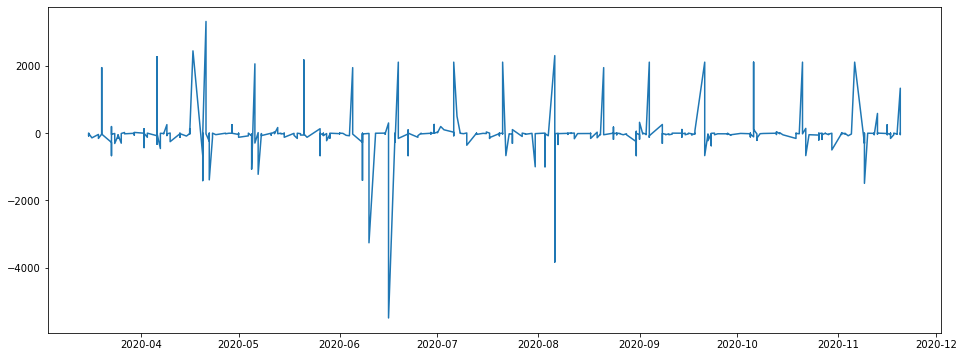

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(grand_df['Date'],grand_df['Amount'])

<BarContainer object of 87 artists>

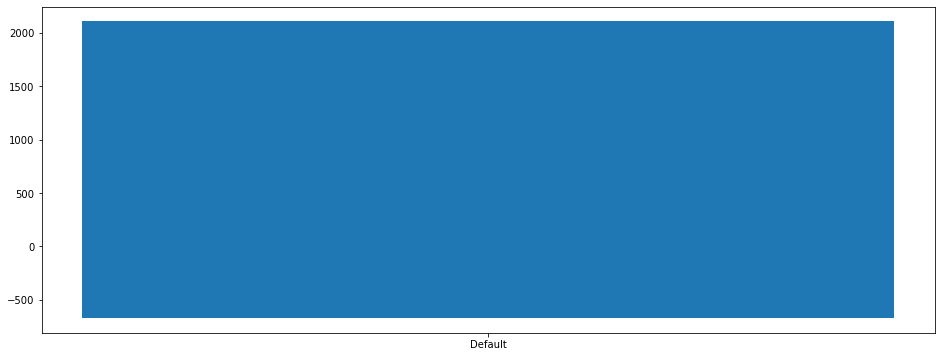

In [116]:
plt.figure(figsize=(16,6))
plt.bar(df['Category'],df['Amount'])

In [117]:
grand_df['Category'].value_counts()

Default                     304
Groceries                   130
Dining Out                   81
Tolls/Uber/Metro/Parking     32
Venmo Extra                  21
Pay Check                    20
Gym                          15
Tithe                        12
Gas                          12
Entertainment                 9
USAA Insurance                8
Name: Category, dtype: int64

In [118]:
grand_df[grand_df['Category'] == 'Default']['Content'].value_counts()

VENMO/PAYMENTWALTER COLEMAN Default                                    27
FEDLOANSERVICING/STDNT LOANWALTER COLEMAN                              10
POS PURCHASE Non-PINVTG*Emmaus Family Couns 703-7292822 VA000000        8
VERIZON/PAYMENTRECWALTER COLEMAN Default                                8
Person-to-Person TransferPAYPAL*Coleman Walter San Jose CACNP TX        7
WASHINGTON GAS/PAYMENTEvan Barnes                                       7
ROBINHOOD/FundsWalter Coleman Default                                   6
Person-to-Person TransferPOP*Margaret Coleman Visa Direct VAPOPMON      5
POS PURCHASE Non-PINCROWNE PLAZA NATIONAL R ARLINGTON VA69              5
TOM COLEMAN/BILL PAYMTCOLEMAN WALTER                                    5
POS PURCHASE Non-PINTortas y Tacos La Chiqu Arlington VA007885          4
WEBULL FINANCIAL/ACHWALTER COLEMAN                                      3
DOMINION ENERGY/BILLPAYWALTER COLEMAN                                   3
FUNDRISE GROWTH/2025840550WALTER COLEM

In [119]:
import seaborn as sns

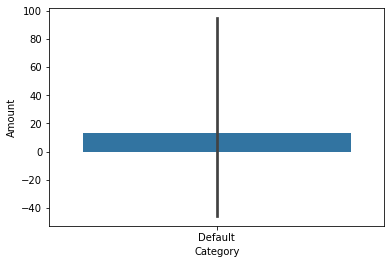

In [121]:
sns.barplot(df['Category'],df['Amount'])

In [133]:
def extra_categorize(df):
    df.loc[df['Content'].str.contains("STARBUCKS",na=False),'Category'] = 'Dining Out'
    df.loc[df['Content'].str.contains("UBER TRIP",na=False),'Category'] = 'Tolls/Uber/Metro/Parking'
    df.loc[df['Content'].str.contains("VERIZON",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("WASHINGTON GAS",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("ENERGY",na=False),'Category'] = 'Utilities'
    df.loc[df['Content'].str.contains("TOM COLEMAN",na=False),'Category'] = 'Phone'
    df.loc[df['Content'].str.contains("STDNT LOAN",na=False),'Category'] = 'Student Loans'
    df.loc[(df['Content'].str.contains("VENMO/PAYMENTWALTER COLEMAN Default",na=False)) &
           (df['Amount'] == -668.75),'Category'] = 'Rent'
    df.loc[df['Content'].str.contains("Margaret Coleman",na=False),'Category'] = 'Extra'
    df.loc[df['Content'].str.contains("Person-to-Person TransferPAYPAL",na=False),'Category'] = 'Extra'
    return df

In [134]:
grand_df = extra_categorize(grand_df)

In [135]:
grand_df[grand_df['Category'] == 'Default']['Content'].value_counts()

VENMO/PAYMENTWALTER COLEMAN Default                                    19
POS PURCHASE Non-PINVTG*Emmaus Family Couns 703-7292822 VA000000        8
ROBINHOOD/FundsWalter Coleman Default                                   6
POS PURCHASE Non-PINCROWNE PLAZA NATIONAL R ARLINGTON VA69              5
POS PURCHASE Non-PINTortas y Tacos La Chiqu Arlington VA007885          4
FUNDRISE/2025840550WALTER COLEMAN                                       3
WEBULL FINANCIAL/ACHWALTER COLEMAN                                      3
FUNDRISE GROWTH/2025840550WALTER COLEMAN                                3
POS PURCHASE Non-PINBRONSON OF ARLINGTON ARLINGTON VA000026             2
ARLINGTON COUNTY/ARLCO PMTWALTER Default                                2
POS PURCHASE Non-PINAmazon web services aws.amazon.co WAIN0800          2
POS PURCHASE Non-PINWE THE PIZZA ARLINGTON VA 793031                    2
POS PURCHASE with PINALDI 71180 BAILEY CROSSR VA 537198                 2
POS PURCHASE Non-PIN708 BOWLERO ARLING

In [136]:
grand_df['Category'].value_counts()

Default                     230
Groceries                   130
Dining Out                   89
Tolls/Uber/Metro/Parking     38
Utilities                    22
Venmo Extra                  21
Pay Check                    20
Gym                          15
Student Loans                13
Tithe                        12
Gas                          12
Extra                        12
Entertainment                 9
Rent                          8
USAA Insurance                8
Phone                         5
Name: Category, dtype: int64

In [137]:
abriged_df = grand_df[grand_df['Category'] != 'Default']

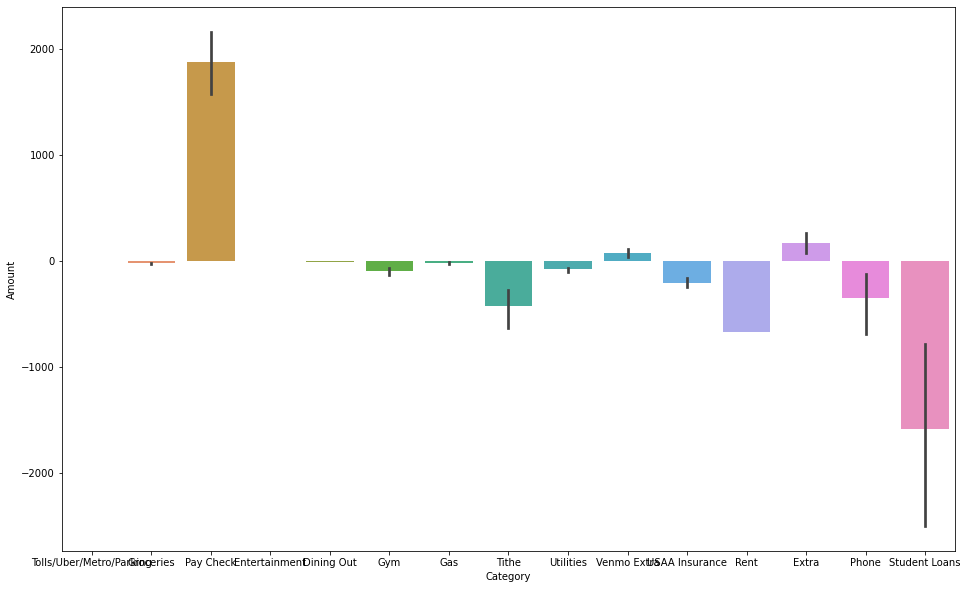

In [140]:
plt.figure(figsize=(16,10))
sns.barplot(abriged_df['Category'],abriged_df['Amount'])

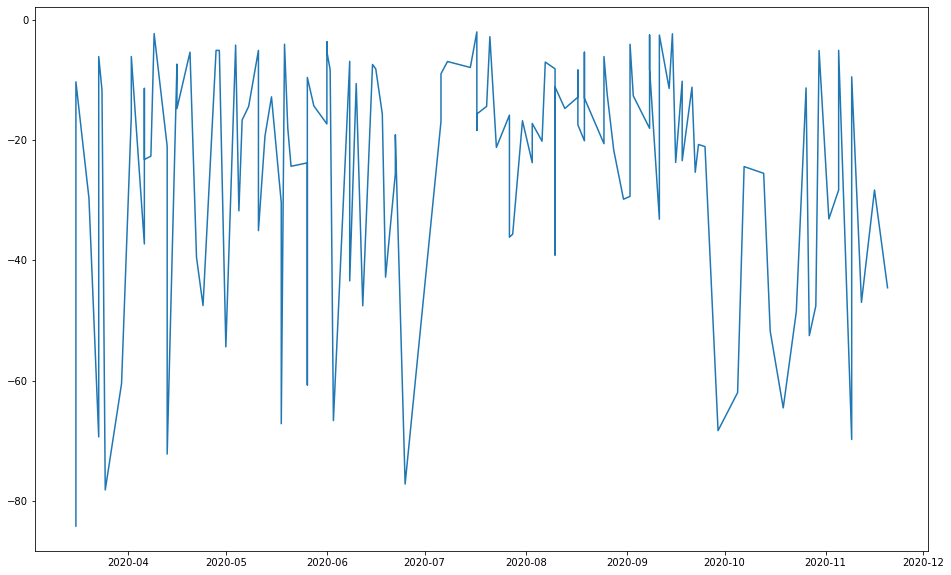

In [143]:
plt.figure(figsize=(16,10))
x = grand_df[grand_df['Category'] == 'Groceries']['Date']
y = grand_df[grand_df['Category'] == 'Groceries']['Amount']
plt.plot(x,y)

In [147]:
grand_df.groupby('Date')['Amount'].sum()

Date
2020-03-16    -144.81
2020-03-17    -141.79
2020-03-19    -199.17
2020-03-20    1881.82
2020-03-23    -922.95
2020-03-24    -320.82
2020-03-25    -275.64
2020-03-26    -355.40
2020-03-27      -2.16
2020-03-30     -84.05
2020-04-02    -332.81
2020-04-03    -146.33
2020-04-06    1813.99
2020-04-07    -793.84
2020-04-08     -37.21
2020-04-09     135.10
2020-04-10    -253.04
2020-04-13    -243.34
2020-04-15     -88.70
2020-04-16      34.20
2020-04-17    2439.00
2020-04-20   -3533.72
2020-04-21    3289.49
2020-04-22   -1803.67
2020-04-23    -144.58
2020-04-24     -47.51
2020-04-27     -24.93
2020-04-28      -5.11
2020-04-29     239.90
2020-05-01    -369.14
2020-05-04     -97.83
2020-05-05   -1185.12
2020-05-06    1724.20
2020-05-07   -1209.64
2020-05-08     -89.42
2020-05-11    -195.19
2020-05-12       4.74
2020-05-13     145.49
2020-05-14     -29.75
2020-05-15    -164.70
2020-05-18    -120.56
2020-05-19    -163.09
2020-05-20     -77.22
2020-05-21    2088.10
2020-05-22    -125.00
2020-

In [176]:
month_groceries = grand_df[grand_df['Category'] == 'Groceries'].groupby(grand_df['Date'].dt.strftime('%B'))\
    ['Amount'].sum()

In [177]:
month_groceries

Date
April       -337.05
August      -309.60
July        -219.93
June        -405.82
March       -375.78
May         -460.84
November    -265.67
October     -393.34
September   -345.61
Name: Amount, dtype: float64

In [178]:
month_groceries.index = [4,8,7,6,3,5,11,10,9]

In [179]:
month_groceries

4    -337.05
8    -309.60
7    -219.93
6    -405.82
3    -375.78
5    -460.84
11   -265.67
10   -393.34
9    -345.61
Name: Amount, dtype: float64

In [181]:
month_groceries = month_groceries.sort_index()

In [182]:
month_groceries

3    -375.78
4    -337.05
5    -460.84
6    -405.82
7    -219.93
8    -309.60
9    -345.61
10   -393.34
11   -265.67
Name: Amount, dtype: float64

In [183]:
month_groceries.index = ['March','April','May','June','July','Aug','Sept','Oct','Nov']

In [184]:
# month_groceries.index = month_groceries.index.strftime('%B')
month_groceries = month_groceries*-1

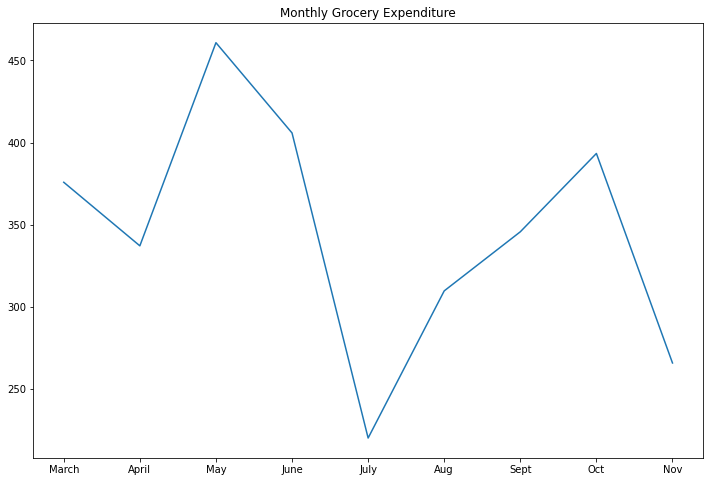

In [192]:
month_groceries = month_groceries*-1
plt.figure(figsize=(12,8))
plt.title('Monthly Grocery Expenditure')
plt.plot(month_groceries.index,month_groceries)
plt.savefig('MonthlyExpenditure')